In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("YearlyPrisonForecastData.csv" )

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 48 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0    Date                                                                                  22 non-null     object 
 1    Fiscal Year                                                                           22 non-null     object 
 2    Total Police Workforce                                                                22 non-null     object 
 3    Total Police Officers                                                                 22 non-null     object 
 4    Total Police       Staff                                                              22 non-null     object 
 5    Total PCSO's (Police Community Support Officers)                               

In [32]:
# ChatGpt to prettify the column names:
# Apply column mapping
new_columns = [
    "date",
    "fiscal_year",
    "police_workforce",
    "police_officers",
    "police_staff",
    "pcsos",
    "special_constables",
    "crime_survey_ons",
    "crime_police",
    "charges_same_period",
    "charges_closed_cases",
    "mc_prosecutions",
    "mc_discontinued",
    "mc_charge_withdrawn",
    "mc_other_disposal",
    "mc_committed_cc",
    "mc_convictions",
    "mc_sent_cc",
    "mc_sentenced",
    "mc_abs_discharge",
    "mc_cond_discharge",
    "mc_fine",
    "mc_community_sentences",
    "mc_suspended_sentences",
    "mc_custody",
    "mc_compensation",
    "mc_otherwise",
    "mc_disposal_unknown",
    "mc_pre_offence_charge_mean",
    "mc_pre_offence_charge_median",
    "mc_pre_charge_listing_mean",
    "mc_pre_charge_listing_median",
    "mc_court_listing_completion_mean",
    "mc_offence_completion_mean",
    "mc_offence_completion_median",
    "cc_sent_for_trial",
    "cc_sent_from_mc",
    "cc_discontinued",
    "cc_acquitted",
    "cc_other_disposal",
    "cc_convictions",
    "cc_sentenced",
    "prison_calendar_year",
    "prison_quarter",
    "prison_remand",
    "prison_sentenced",
    "prison_non_criminal",
    "prison_total",
]
df.columns = new_columns
df.columns

Index(['date', 'fiscal_year', 'police_workforce', 'police_officers',
       'police_staff', 'pcsos', 'special_constables', 'crime_survey_ons',
       'crime_police', 'charges_same_period', 'charges_closed_cases',
       'mc_prosecutions', 'mc_discontinued', 'mc_charge_withdrawn',
       'mc_other_disposal', 'mc_committed_cc', 'mc_convictions', 'mc_sent_cc',
       'mc_sentenced', 'mc_abs_discharge', 'mc_cond_discharge', 'mc_fine',
       'mc_community_sentences', 'mc_suspended_sentences', 'mc_custody',
       'mc_compensation', 'mc_otherwise', 'mc_disposal_unknown',
       'mc_pre_offence_charge_mean', 'mc_pre_offence_charge_median',
       'mc_pre_charge_listing_mean', 'mc_pre_charge_listing_median',
       'mc_court_listing_completion_mean', 'mc_offence_completion_mean',
       'mc_offence_completion_median', 'cc_sent_for_trial', 'cc_sent_from_mc',
       'cc_discontinued', 'cc_acquitted', 'cc_other_disposal',
       'cc_convictions', 'cc_sentenced', 'prison_calendar_year',
       'p

In [76]:
# Define target (GDP Growth) and lag it to simulate nowcasting
df['prison_remand_nxtyr'] = df['prison_remand'].fillna('0').str.replace(',', '').astype(int).shift(1) 
df.tail(3)

,date,fiscal_year,police_workforce,police_officers,police_staff,pcsos,special_constables,crime_survey_ons,crime_police,charges_same_period,...,cc_convictions,cc_sentenced,prison_calendar_year,prison_quarter,prison_remand,prison_sentenced,prison_non_criminal,prison_total,prison_remand_lagged,prison_remand_nxtyr
19,31 March 2022,2021-22,"225,229","140,228","76,250","8,750","8,545",NaN,"6,341,734","296,189",...,"49,823","74,584",2022.0,2022-03,"12,747","66,167",859,"79,773","12,262",12262.0
20,31 March 2023,2022-23,"233,836","147,434","78,596","7,806","6,841","8,656","6,736,894","312,167",...,"45,347","68,119",2023.0,2023-03,"14,591","69,119",662,"84,372","12,747",12747.0
21,31 March 2024,2023-24,"236,588","147,746","81,303","7,539","6,118","8,787","6,655,105","341,010",...,"51,921","58,028",2024.0,2024-03,"16,458","70,999",412,"87,869","14,591",14591.0


In [75]:
shortendf = df[df['prison_remand_nxtyr'] != 0]
shortendf 

,date,fiscal_year,police_workforce,police_officers,police_staff,pcsos,special_constables,crime_survey_ons,crime_police,charges_same_period,...,cc_convictions,cc_sentenced,prison_calendar_year,prison_quarter,prison_remand,prison_sentenced,prison_non_criminal,prison_total,prison_remand_lagged,prison_remand_nxtyr
0,31 March 2003,2002-03,"198,375","132,509","62,581","1,176","11,037",NaN,"5,974,960",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
14,31 March 2017,2016-17,"198,686","123,142","65,319","10,213","13,502","11,216","4,952,841","527,076",...,"62,823","82,203",2017.0,2017-03,"9,419","74,623","1,471","85,513","10,066",10066.0
15,31 March 2018,2017-18,"199,753","122,405","67,200","10,139","11,690","10,729","5,506,557","483,932",...,"60,058","81,959",2018.0,2018-03,"9,263","73,035",965,"83,263","9,419",9419.0
16,31 March 2019,2018-19,"202,039","123,189","69,302","9,547","10,642","11,207","5,961,358","403,221",...,"53,094","76,047",2019.0,2019-03,"8,957","72,860",817,"82,634","9,263",9263.0
17,31 March 2020,2019-20,"210,689","129,110","72,331","9,248","9,571","10,213","6,079,733","350,863",...,"48,867","72,902",2020.0,2020-03,"10,043","72,187",760,"82,990","8,957",8957.0
18,31 March 2021,2020-21,"220,519","135,301","75,934","9,284","9,174",NaN,"5,433,564","315,158",...,"40,333","62,419",2021.0,2021-03,"12,262","64,783","1,013","78,058","10,043",10043.0
19,31 March 2022,2021-22,"225,229","140,228","76,250","8,750","8,545",NaN,"6,341,734","296,189",...,"49,823","74,584",2022.0,2022-03,"12,747","66,167",859,"79,773","12,262",12262.0
20,31 March 2023,2022-23,"233,836","147,434","78,596","7,806","6,841","8,656","6,736,894","312,167",...,"45,347","68,119",2023.0,2023-03,"14,591","69,119",662,"84,372","12,747",12747.0
21,31 March 2024,2023-24,"236,588","147,746","81,303","7,539","6,118","8,787","6,655,105","341,010",...,"51,921","58,028",2024.0,2024-03,"16,458","70,999",412,"87,869","14,591",14591.0


In [86]:
# Drop rows with NaN values (since we shifted GDP Growth)
shortendf = df[df['prison_remand_nxtyr'] != 0]
# Drop rows with NaN values (since we shifted GDP Growth)
shortendf.dropna(subset=['prison_remand_nxtyr'],inplace=True)
y = pd.DataFrame(shortendf['prison_remand_nxtyr'])
X = shortendf[['prison_calendar_year','crime_police', 'charges_same_period','mc_prosecutions',  'mc_convictions', 'mc_sent_cc','mc_sentenced','cc_sent_for_trial', 'cc_sent_from_mc','cc_convictions', 'cc_sentenced']]
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].str.replace(',', '').astype(int)
#Last Year Data as predictor

C:\Users\Will\AppData\Local\Temp\ipykernel_38800\1831335966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortendf.dropna(subset=['prison_remand_nxtyr'],inplace=True)
C:\Users\Will\AppData\Local\Temp\ipykernel_38800\1831335966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '').astype(int)


In [87]:
X

,prison_calendar_year,crime_police,charges_same_period,mc_prosecutions,mc_convictions,mc_sent_cc,mc_sentenced,cc_sent_for_trial,cc_sent_from_mc,cc_convictions,cc_sentenced
14,2017.0,4952841,527076,1443176.0,1180695.0,20504.0,1160191.0,79158,19526,62823,82203
15,2018.0,5506557,483932,1354374.0,1142551.0,20477.0,1122074.0,74969,22496,60058,81959
16,2019.0,5961358,403221,1346140.0,1144603.0,21469.0,1123134.0,66301,23630,53094,76047
17,2020.0,6079733,350863,1319110.0,1116090.0,23318.0,1092772.0,59759,24795,48867,72902
18,2021.0,5433564,315158,878281.0,728578.0,21741.0,706837.0,49142,22784,40333,62419
19,2022.0,6341734,296189,1117151.0,951043.0,22498.0,928545.0,63435,25647,49823,74584
20,2023.0,6736894,312167,1193680.0,1016183.0,21947.0,994235.0,59372,23767,45347,68119
21,2024.0,6655105,341010,1282696.0,1081210.0,28522.0,1052688.0,70028,28522,51921,58028


In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Train-Test Split (keep time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

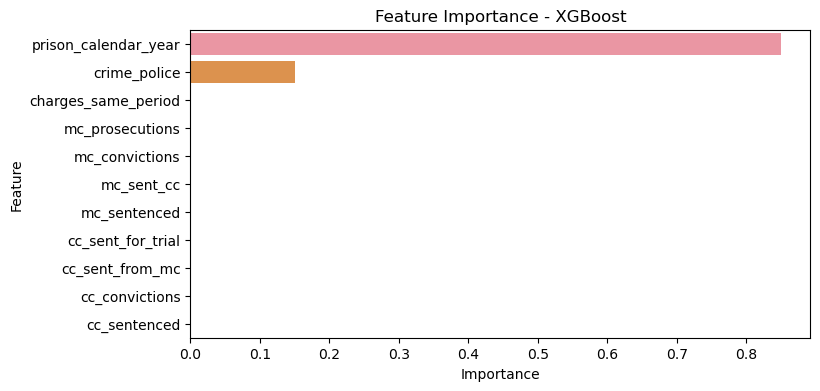

C:\Users\Will\AppData\Local\Temp\ipykernel_38800\2993879982.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


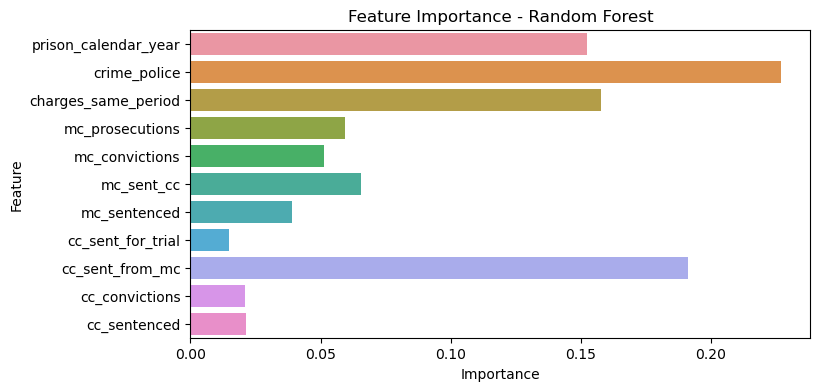


Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:     prison_remand_nxtyr   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Thu, 06 Feb 2025   Prob (F-statistic):                nan
Time:                         16:55:15   Log-Likelihood:                 127.01
No. Observations:                    6   AIC:                            -242.0
Df Residuals:                        0   BIC:                            -243.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import statsmodels.api as sm

models = {
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}
# Store results
results = []

# Loop through models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({"Model": name, "MAE": mae, "R² Score": r2})
    
    # Feature Importance (only for tree-based models)
    if name != "Linear Regression":
        importances = model.feature_importances_
        feature_names = X_train.columns
        
        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances, y=feature_names)
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance - {name}")
        plt.show()

		
 # Extract Coefficients & P-Values for Linear Regression
    if name == "Linear Regression":
        X_train_const = sm.add_constant(X_train)  # Add constant for intercept
        lin_reg = sm.OLS(y_train, X_train_const).fit()
        
        print("\nLinear Regression Summary:")
        print(lin_reg.summary())
		
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)